In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [242]:
A = 0.20
beta = 0.1
mu = (1+A)/2
nu = (1-A)/2
alpha = np.pi/2- beta
print('mu,nu,alpha',mu,nu,alpha)

mu,nu,alpha 0.6 0.4 1.4707963267948965


(-0.1, 0.1)

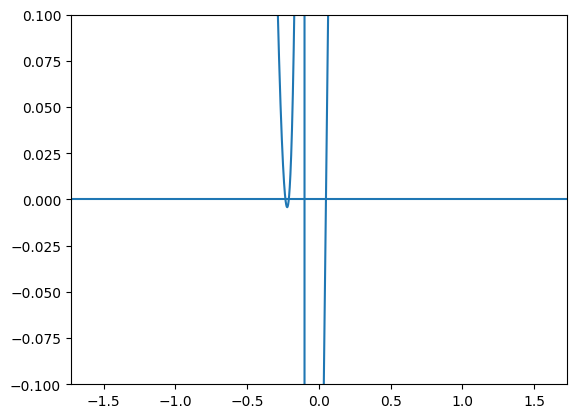

In [243]:
phis = np.linspace(-np.pi/2,np.pi/2,10000)

def dpi_0(psi,alpha,mu,nu):
    A = -mu*np.sin(alpha) + mu*np.sin(psi)/(2*np.cos(alpha - psi)) + nu**2*np.sin(alpha + psi)*np.cos(alpha - psi)/(mu*np.cos(alpha)) + nu**2*np.sin(psi)*np.cos(alpha - psi)/(2*mu*np.cos(alpha)**2)
    return A
plt.plot(phis,dpi_0(phis,alpha,mu,nu))
plt.axhline(0)
plt.ylim(-0.1,0.1)
# plt.xlim(0.025,0.05)

In [244]:
from scipy.optimize import fsolve

initial_guesses = np.linspace(-0.5,0.5, 100)  # 초기 추정값들의 배열
solutions = set()

def dpi_0(psi,alpha,mu,nu):
    A = -mu*np.sin(alpha) + mu*np.sin(psi)/(2*np.cos(alpha - psi)) + nu**2*np.sin(alpha + psi)*np.cos(alpha - psi)/(mu*np.cos(alpha)) + nu**2*np.sin(psi)*np.cos(alpha - psi)/(2*mu*np.cos(alpha)**2)
    return A

for guess in initial_guesses:
    solution = fsolve(dpi_0, guess,args=(alpha,mu,nu))
    solutions.add(round(solution[0], 7))  # 근을 소수점 5자리로 반올림하여 추가
    
Rs = []
psis = []
def get_R(psi,alpha,mu,nu):
    R = - nu*np.cos(alpha-psi)/(mu*np.cos(alpha))
    return R
for psi in solutions:
    R = get_R(psi,alpha,mu,nu)
    if R>0:
        Rs.append(R)
        psis.append(psi)
Rs,psis  = map(np.array,[Rs,psis])
xs_ = Rs*np.cos(psis)
ys_ = Rs*np.sin(psis)
print(list(zip(xs_,ys_)))

[(0.8596169842198307, -0.20370685044164355), (0.7132181994867528, -0.1515757193173003)]


In [245]:
solutions

{-0.2326818, -0.209408, 0.0497121}

In [246]:
def PLOTX1(X,alpha,mu,nu,r):
    Y=(-5*X*nu*np.cos(alpha)*r**2 + X*nu*np.cos(alpha) - 2*mu*np.cos(alpha)*r**4 + 2*mu*np.cos(alpha)*r**2 - np.sqrt(33*X**2*nu**2*np.cos(alpha)**2*r**4 - 26*X**2*nu**2*np.cos(alpha)**2*r**2 + 9*X**2*nu**2*np.cos(alpha)**2 - 8*X**2*nu**2*r**4 + 16*X**2*nu**2*r**2 - 8*X**2*nu**2 + 12*X*mu*nu*np.cos(alpha)**2*r**6 - 8*X*mu*nu*np.cos(alpha)**2*r**4 - 4*X*mu*nu*np.cos(alpha)**2*r**2 + 8*X*mu*nu*r**6 - 16*X*mu*nu*r**4 + 8*X*mu*nu*r**2 + 4*mu**2*np.cos(alpha)**2*r**8 - 8*mu**2*np.cos(alpha)**2*r**6 + 4*mu**2*np.cos(alpha)**2*r**4))/(4*nu*(r**2 - 1)*np.sin(alpha))
    return Y

def PLOTX2(X,alpha,mu,nu,r):
    Y=(-5*X*nu*np.cos(alpha)*r**2 + X*nu*np.cos(alpha) - 2*mu*np.cos(alpha)*r**4 + 2*mu*np.cos(alpha)*r**2 + np.sqrt(33*X**2*nu**2*np.cos(alpha)**2*r**4 - 26*X**2*nu**2*np.cos(alpha)**2*r**2 + 9*X**2*nu**2*np.cos(alpha)**2 - 8*X**2*nu**2*r**4 + 16*X**2*nu**2*r**2 - 8*X**2*nu**2 + 12*X*mu*nu*np.cos(alpha)**2*r**6 - 8*X*mu*nu*np.cos(alpha)**2*r**4 - 4*X*mu*nu*np.cos(alpha)**2*r**2 + 8*X*mu*nu*r**6 - 16*X*mu*nu*r**4 + 8*X*mu*nu*r**2 + 4*mu**2*np.cos(alpha)**2*r**8 - 8*mu**2*np.cos(alpha)**2*r**6 + 4*mu**2*np.cos(alpha)**2*r**4))/(4*nu*(r**2 - 1)*np.sin(alpha))
    return Y

def PLOTX3(X,alpha,mu,nu,r):
    Y =(-np.sqrt((X*nu + mu*r**2)*(r - 1)*(r + 1)*(-23*X*nu*np.sin(alpha)**2*r**2 - 9*X*nu*np.sin(alpha)**2 + 24*X*nu*r**2 + 8*X*nu + mu*np.sin(alpha)**2*r**4 - mu*np.sin(alpha)**2*r**2)) + (X*nu + mu*r**2)*(r - 1)*(r + 1)*np.sin(alpha))/(2*nu*(3*r**2 + 1)*np.cos(alpha))
    return Y


def PLOTX4(X,alpha,mu,nu,r):
    Y =(np.sqrt((X*nu + mu*r**2)*(r - 1)*(r + 1)*(-23*X*nu*np.sin(alpha)**2*r**2 - 9*X*nu*np.sin(alpha)**2 + 24*X*nu*r**2 + 8*X*nu + mu*np.sin(alpha)**2*r**4 - mu*np.sin(alpha)**2*r**2)) + (X*nu + mu*r**2)*(r - 1)*(r + 1)*np.sin(alpha))/(2*nu*(3*r**2 + 1)*np.cos(alpha))
    return Y

In [247]:
def Fun(r,psi,alpha,mu,nu):
    dr = (1-r**2)*(mu*r*np.cos(alpha)+nu*np.cos(alpha-psi))
    dpsi = (1+r**2)/(2*r)*(mu*r*np.sin(alpha)-nu*np.sin(psi-alpha)) - mu*np.sin(alpha) -nu*r*np.sin(psi+alpha)
    return dr,dpsi

RS = np.linspace(0,1.5,3001)
PSI = np.linspace(-np.pi,np.pi,3001)
RR,PSIS =np.meshgrid(RS,PSI)
DR,DPSI = Fun(RR,PSIS,alpha,mu,nu)
X = RR*np.cos(PSIS)
Y = RR*np.sin(PSIS)

DX = DR*X/RR - DPSI*Y
DY = DR*Y/RR + DPSI*X

C:\Users\kim9y\AppData\Local\Temp\ipykernel_49568\468087625.py:3: RuntimeWarning: divide by zero encountered in divide
  dpsi = (1+r**2)/(2*r)*(mu*r*np.sin(alpha)-nu*np.sin(psi-alpha)) - mu*np.sin(alpha) -nu*r*np.sin(psi+alpha)
C:\Users\kim9y\AppData\Local\Temp\ipykernel_49568\468087625.py:13: RuntimeWarning: invalid value encountered in divide
  DX = DR*X/RR - DPSI*Y
C:\Users\kim9y\AppData\Local\Temp\ipykernel_49568\468087625.py:13: RuntimeWarning: invalid value encountered in multiply
  DX = DR*X/RR - DPSI*Y
C:\Users\kim9y\AppData\Local\Temp\ipykernel_49568\468087625.py:14: RuntimeWarning: invalid value encountered in divide
  DY = DR*Y/RR + DPSI*X
C:\Users\kim9y\AppData\Local\Temp\ipykernel_49568\468087625.py:14: RuntimeWarning: invalid value encountered in multiply
  DY = DR*Y/RR + DPSI*X


In [248]:
RS = np.linspace(0,1,301)
PSI = np.linspace(-np.pi,np.pi,301)
RR,PSIS =np.meshgrid(RS,PSI)
DR,DPSI = Fun(RR,PSIS,alpha,mu,nu)
X = RR*np.cos(PSIS)
Y = RR*np.sin(PSIS)

DX = DR*X/RR - DPSI*Y
DY = DR*Y/RR + DPSI*X
M = (np.hypot(DX,DY))
U = DX / np.sqrt(DX**2 + DY**2);
V = DY / np.sqrt(DX**2 + DY**2);

C:\Users\kim9y\AppData\Local\Temp\ipykernel_49568\468087625.py:3: RuntimeWarning: divide by zero encountered in divide
  dpsi = (1+r**2)/(2*r)*(mu*r*np.sin(alpha)-nu*np.sin(psi-alpha)) - mu*np.sin(alpha) -nu*r*np.sin(psi+alpha)
C:\Users\kim9y\AppData\Local\Temp\ipykernel_49568\3268089642.py:8: RuntimeWarning: invalid value encountered in divide
  DX = DR*X/RR - DPSI*Y
C:\Users\kim9y\AppData\Local\Temp\ipykernel_49568\3268089642.py:8: RuntimeWarning: invalid value encountered in multiply
  DX = DR*X/RR - DPSI*Y
C:\Users\kim9y\AppData\Local\Temp\ipykernel_49568\3268089642.py:9: RuntimeWarning: invalid value encountered in divide
  DY = DR*Y/RR + DPSI*X
C:\Users\kim9y\AppData\Local\Temp\ipykernel_49568\3268089642.py:9: RuntimeWarning: invalid value encountered in multiply
  DY = DR*Y/RR + DPSI*X


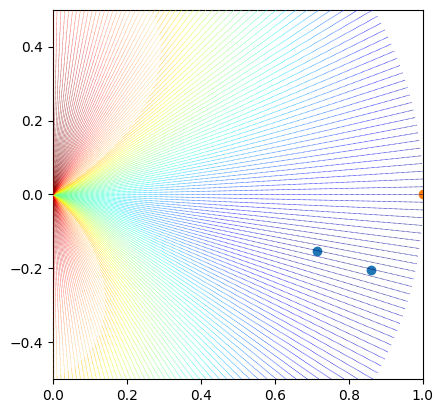

In [249]:
Q = plt.quiver(X,Y,DX,DY,M,pivot='mid',cmap='jet',zorder=3)
plt.scatter(Rs*np.cos(psis),Rs*np.sin(psis))
plt.scatter(1,0)
plt.ylim(-0.5,0.5)
plt.xlim(0,1)
plt.gca().set_aspect(1)

In [250]:
M = (np.hypot(DX,DY))

C:\Users\kim9y\AppData\Local\Temp\ipykernel_49568\1483721758.py:1: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(X,Y,M,vmax=0.1)


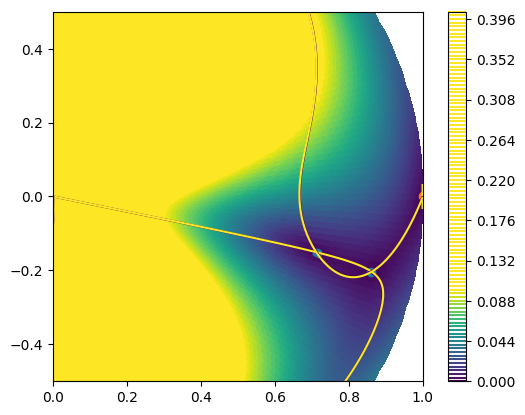

In [251]:
plt.pcolormesh(X,Y,M,vmax=0.1)

plt.contour(X,Y,M,levels=100,vmax=0.1)
plt.colorbar()
plt.contour(X,Y,DX,levels=[0-1e-4,0+1e-4])
plt.contour(X,Y,DY,levels=[0-1e-4,0+1e-4])
plt.scatter(Rs*np.cos(psis),Rs*np.sin(psis))
plt.scatter(1,0)
plt.ylim(-0.5,0.5)
plt.xlim(0,1)
plt.gca().set_aspect(1)


C:\Users\kim9y\AppData\Local\Temp\ipykernel_49568\351482141.py:1: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(X,-Y,M,vmax=0.1)


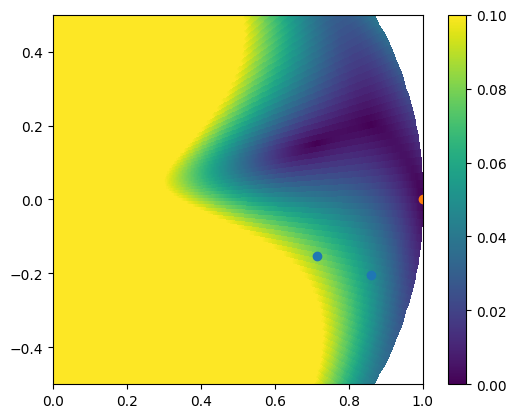

In [252]:
plt.pcolormesh(X,-Y,M,vmax=0.1)
plt.colorbar()
plt.scatter(Rs*np.cos(psis),Rs*np.sin(psis))
plt.scatter(1,0)
plt.ylim(-0.5,0.5)
plt.xlim(0,1)
plt.gca().set_aspect(1)

C:\Users\kim9y\AppData\Local\Temp\ipykernel_49568\4270238996.py:2: RuntimeWarning: invalid value encountered in sqrt
  Y=(-5*X*nu*np.cos(alpha)*r**2 + X*nu*np.cos(alpha) - 2*mu*np.cos(alpha)*r**4 + 2*mu*np.cos(alpha)*r**2 - np.sqrt(33*X**2*nu**2*np.cos(alpha)**2*r**4 - 26*X**2*nu**2*np.cos(alpha)**2*r**2 + 9*X**2*nu**2*np.cos(alpha)**2 - 8*X**2*nu**2*r**4 + 16*X**2*nu**2*r**2 - 8*X**2*nu**2 + 12*X*mu*nu*np.cos(alpha)**2*r**6 - 8*X*mu*nu*np.cos(alpha)**2*r**4 - 4*X*mu*nu*np.cos(alpha)**2*r**2 + 8*X*mu*nu*r**6 - 16*X*mu*nu*r**4 + 8*X*mu*nu*r**2 + 4*mu**2*np.cos(alpha)**2*r**8 - 8*mu**2*np.cos(alpha)**2*r**6 + 4*mu**2*np.cos(alpha)**2*r**4))/(4*nu*(r**2 - 1)*np.sin(alpha))
C:\Users\kim9y\AppData\Local\Temp\ipykernel_49568\4270238996.py:6: RuntimeWarning: invalid value encountered in sqrt
  Y=(-5*X*nu*np.cos(alpha)*r**2 + X*nu*np.cos(alpha) - 2*mu*np.cos(alpha)*r**4 + 2*mu*np.cos(alpha)*r**2 + np.sqrt(33*X**2*nu**2*np.cos(alpha)**2*r**4 - 26*X**2*nu**2*np.cos(alpha)**2*r**2 + 9*X**2*nu**2*

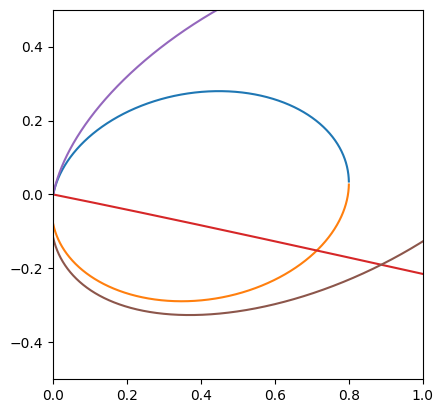

In [253]:
xs = np.linspace(0,1,10000)

plt.ylim(-0.5,0.5)
plt.xlim(0,1)
plt.plot(xs,PLOTX1(xs,alpha,mu,nu,0.72916031))
plt.plot(xs,PLOTX2(xs,alpha,mu,nu,0.72916031))
plt.plot(xs,PLOTX3(xs,alpha,mu,nu,0.72916031))
plt.plot(xs,PLOTX4(xs,alpha,mu,nu,0.72916031))



plt.plot(xs,PLOTX1(xs,alpha,mu,nu,0.88341202))
plt.plot(xs,PLOTX2(xs,alpha,mu,nu,0.88341202))
plt.gca().set_aspect(1)



# r을 바꾸어 가면서 X Y로 표현

In [254]:
def Fun(X,Y,alpha,mu,nu):
    dx = (X**2*nu*np.cos(alpha) + Y*nu*(X*np.sin(alpha) + Y*np.cos(alpha))/2 + (X**2 + Y**2)*(-2*X**2*nu*np.cos(alpha) - X*Y*nu*np.sin(alpha) - 2*X*mu*(X**2 + Y**2)*np.cos(alpha) + 2*X*mu*np.cos(alpha) + 3*Y**2*nu*np.cos(alpha) - Y*mu*(X**2 + Y**2)*np.sin(alpha) + Y*mu*np.sin(alpha))/2)/(X**2 + Y**2)
    dy = (X*nu*(X*np.sin(alpha) + Y*np.cos(alpha))/2 + Y**2*nu*np.sin(alpha) + (X**2 + Y**2)*(-X**2*nu*np.sin(alpha) - 5*X*Y*nu*np.cos(alpha) + X*mu*(X**2 + Y**2)*np.sin(alpha) - X*mu*np.sin(alpha) - 2*Y**2*nu*np.sin(alpha) - 2*Y*mu*(X**2 + Y**2)*np.cos(alpha) + 2*Y*mu*np.cos(alpha))/2)/(X**2 + Y**2)
    return dx,dy

In [295]:
xs = np.linspace(0.0,1,5000)
ys = np.linspace(-0.5,0,5000)
X,Y = np.meshgrid(xs,ys)

In [296]:
DX,DY = Fun(X,Y,alpha,mu,nu)
M = (np.hypot(DX,DY))
U = DX / np.sqrt(DX**2 + DY**2);
V = DY / np.sqrt(DX**2 + DY**2);

C:\Users\kim9y\AppData\Local\Temp\ipykernel_49568\2401693440.py:2: RuntimeWarning: invalid value encountered in divide
  dx = (X**2*nu*np.cos(alpha) + Y*nu*(X*np.sin(alpha) + Y*np.cos(alpha))/2 + (X**2 + Y**2)*(-2*X**2*nu*np.cos(alpha) - X*Y*nu*np.sin(alpha) - 2*X*mu*(X**2 + Y**2)*np.cos(alpha) + 2*X*mu*np.cos(alpha) + 3*Y**2*nu*np.cos(alpha) - Y*mu*(X**2 + Y**2)*np.sin(alpha) + Y*mu*np.sin(alpha))/2)/(X**2 + Y**2)
C:\Users\kim9y\AppData\Local\Temp\ipykernel_49568\2401693440.py:3: RuntimeWarning: invalid value encountered in divide
  dy = (X*nu*(X*np.sin(alpha) + Y*np.cos(alpha))/2 + Y**2*nu*np.sin(alpha) + (X**2 + Y**2)*(-X**2*nu*np.sin(alpha) - 5*X*Y*nu*np.cos(alpha) + X*mu*(X**2 + Y**2)*np.sin(alpha) - X*mu*np.sin(alpha) - 2*Y**2*nu*np.sin(alpha) - 2*Y*mu*(X**2 + Y**2)*np.cos(alpha) + 2*Y*mu*np.cos(alpha))/2)/(X**2 + Y**2)
C:\Users\kim9y\AppData\Local\Temp\ipykernel_49568\2137610327.py:4: RuntimeWarning: invalid value encountered in divide
  V = DY / np.sqrt(DX**2 + DY**2);


In [298]:
X_0 =(Rs*np.cos(psis))[0]
Y_0 =(Rs*np.sin(psis))[0]

In [291]:
[0.950682959640321],
   [0.310164327815949]]

IndentationError: unexpected indent (2966167005.py, line 2)

In [292]:
X_0+0.950682959640321/200

0.8643703990180323

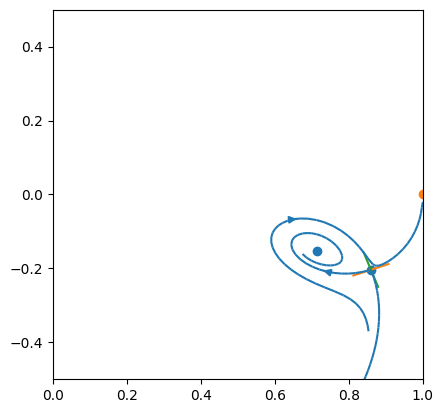

In [299]:
# Q = plt.quiver(X,Y,U,V,M,pivot='mid',cmap='jet',zorder=3)
seed_points = np.array([[*(X_0-0.950682959640321/200,X_0-0.3875/20),1], [*(Y_0-0.310164327815949/200,Y_0+0.9254/20),0]])
# seed_points = np.array([[*(X_0-0.950682959640321/200,X_0+0.950682959640321/200),*(X_0+0.3875/200,X_0-0.3875/200),1], [*(Y_0-0.310164327815949/200,Y_0+0.310164327815949/200),*(Y_0-0.9254/200,Y_0+0.9254/200),0]])
# plt.streamplot(X,Y,DX,DY,cmap='jet',zorder=2)
plt.streamplot(X,Y,DX,DY,cmap='jet',zorder=3,start_points=seed_points.T)
plt.scatter(Rs*np.cos(psis),Rs*np.sin(psis))
plt.plot((X_0-0.950682959640321/20,X_0+0.950682959640321/20),(Y_0-0.310164327815949/20,Y_0+0.310164327815949/20))
plt.plot((X_0+0.3875/20,X_0-0.3875/20),(Y_0-0.9254/20,Y_0+0.9254/20))
# plt.plot((0,-0.387),(0,0.9254))
plt.scatter(1,0)
plt.ylim(-0.5,0.5)
plt.xlim(0,1)
plt.gca().set_aspect(1)

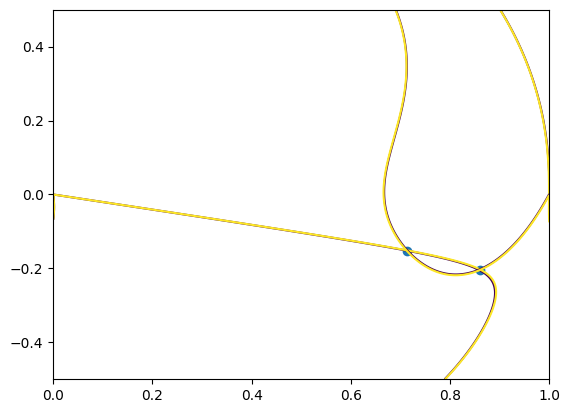

In [159]:
plt.contour(X,Y,DX,levels=[0-1e-4,0+1e-4])
plt.contour(X,Y,DY,levels=[0-1e-4,0+1e-4])
plt.scatter(Rs*np.cos(psis),Rs*np.sin(psis))